In [3]:
!pip3 install seaborn -q

In [4]:
# Block 1: Imports and Load Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = df['species'].map({i: name for i, name in enumerate(target_names)})

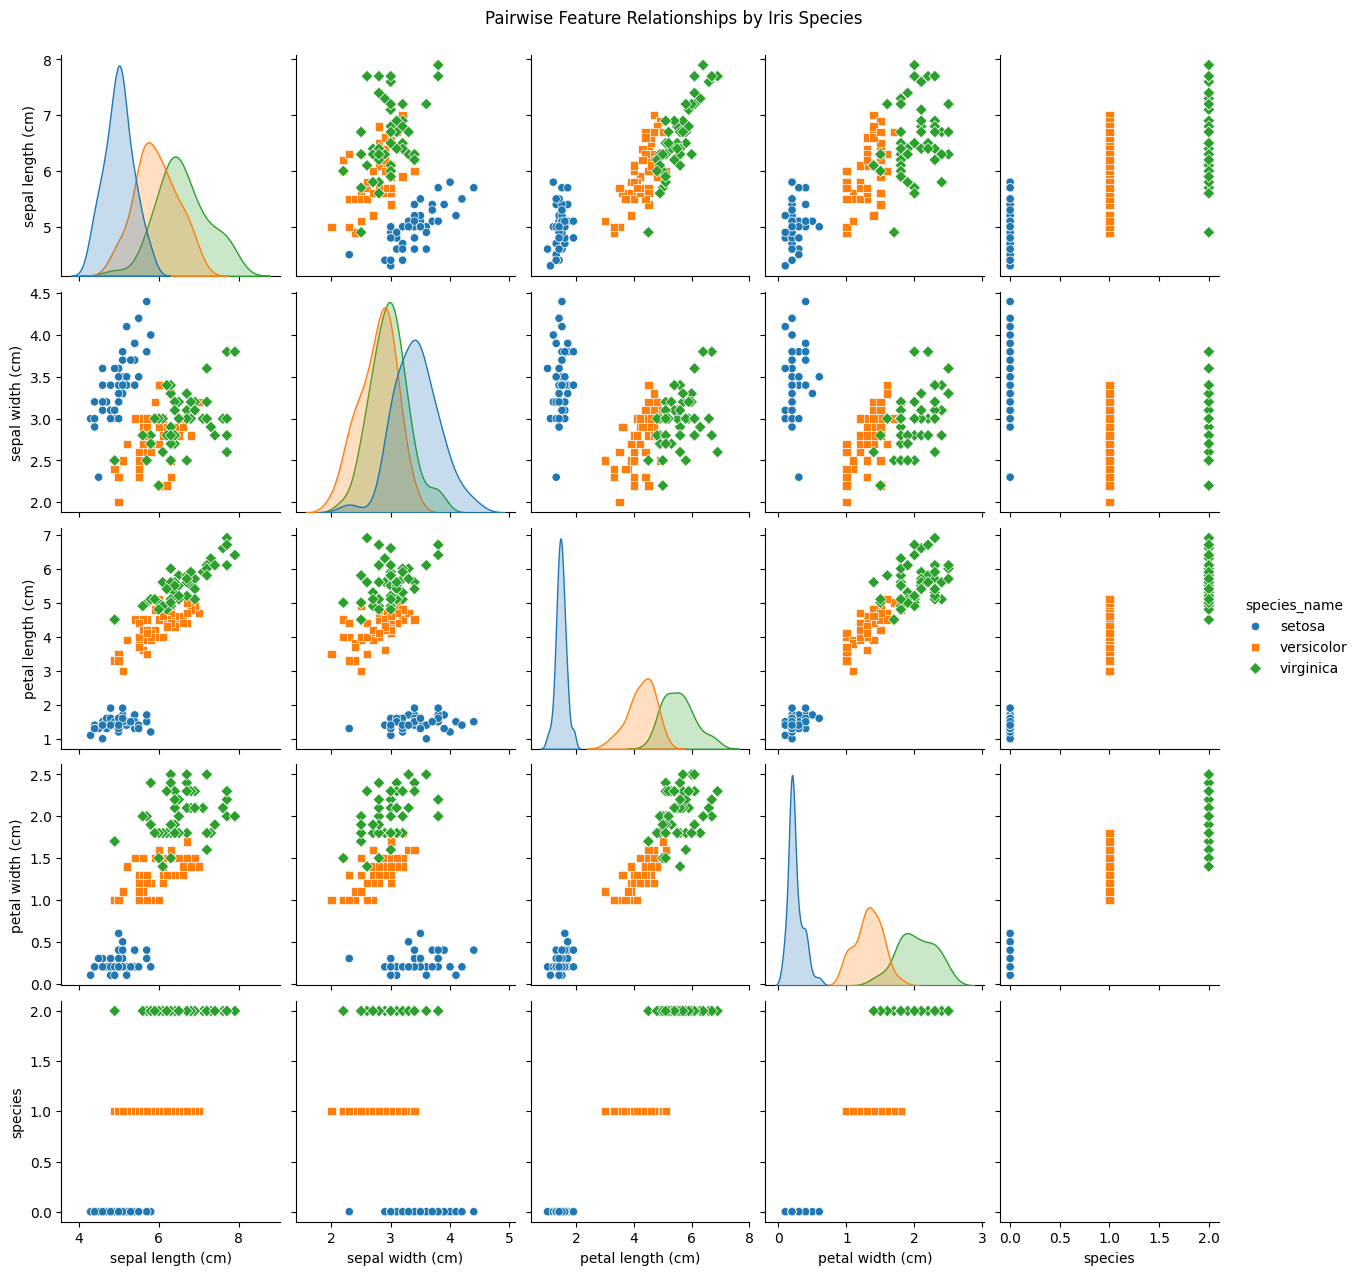

In [5]:
# Block 2: Visualize Pairwise Feature Relationships
sns.pairplot(df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle("Pairwise Feature Relationships by Iris Species", y=1.02)
plt.show()

In [6]:
# Block 3: Train a Simple Classifier (Optional, for pattern separation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"KNN Classifier Accuracy: {accuracy:.4f}")

KNN Classifier Accuracy: 0.9556


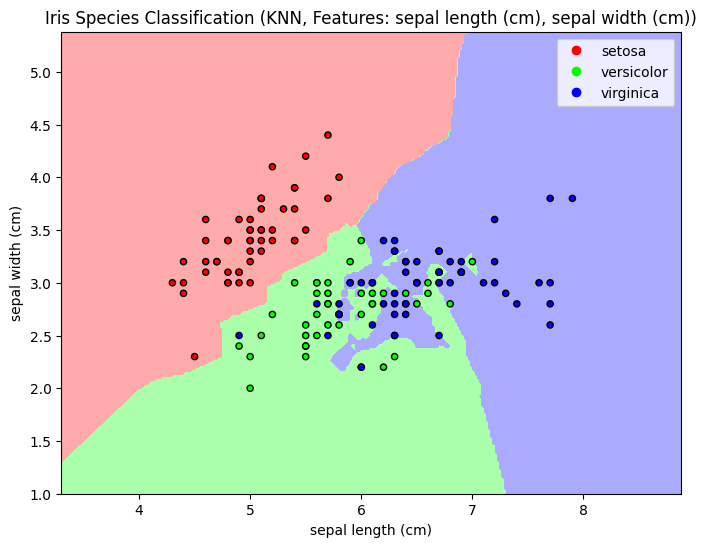

In [7]:
# Block 4: Visualize Decision Boundaries (Example with 2 features)
from matplotlib.colors import ListedColormap

X_reduced = X[:, :2]
knn_reduced = KNeighborsClassifier(n_neighbors=3)
knn_reduced.fit(X_reduced, y)

x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title(f"Iris Species Classification (KNN, Features: {feature_names[0]}, {feature_names[1]})")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(handles=scatter.legend_elements()[0], labels=target_names.tolist())
plt.show()